<img src="Task.png" alt="drawing" width="800"/>

<img src="Coefs.png" alt="drawing" width="600"/>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib notebook

f = lambda x: np.cos(x)


n = 200

Nt = 400
Tf = 5
x1 = -np.pi/2
x2 = np.pi/2
#x2 = 1
T = np.linspace(0,Tf, Nt-2)
x = np.linspace(x1, x2, n+2, True)
h = x[1] - x[0]
t = T[1] - T[0]

#[b c 0 ... 0]   [h**2 * f(x[1])]
#[a b c ... 0]   [h**2 * f(x[2])]
#[0 a c b . 0] = [h**2 * f(x[3])]
#[  ...      ]   [h**2 * f(x[4])]
#[0 ... 0 a b]   [h**2 * f(x[5])]

a = [0]
for i in range(1, n):
    a.append(-1/2*t/h/h)

b = []
for i in range(0, n):
    b.append(1 + t/h/h)

c = []
for i in range(0, n-1):
    c.append(-1/2*t/h/h)
c.append(0.)

h = x[1] - x[0]

# правая часть уравнения (столб) h**2 берем из конечной разницы второго порядка
# пересчет производится с подстановкой значения x в сетке которую ранее задал выше

d = []
for i in range(0, n):
    d.append(xi + t/2*())

#print (a, b, c)


def CoefficientMethod(a, b, c, d, n):
    y = []
    for i in range(0, n):
        y.append(0)

    for i in range(1, n):
        xi = a[i]/b[i-1]
        a[i] = 0
        b[i] -= xi * c[i-1]
        d[i] -= xi * d[i-1]

        #print (a, b, c)

    y[n-1] = d[n-1]/b[n-1]

    for i in range(n-2, -1, -1):
        y[i] = 1/b[i] * (d[i] - c[i]*y[i+1])

    return y

y = [0] + CoefficientMethod(a, b, c, d, n) + [0]

subplot(111)
ln1, = plot(x, y, 'r-', label = 'solution')
ln2, = plot(x, (y + np.sin(x)), 'b-', label = 'err')
grid()
legend()
gcf().canvas.draw()




NameError: name 'xi' is not defined

Задам отдельно оператор разностной схемы для переменного массива
<img src="Differential_op.png" alt="drawing" width="500"/>
Вводим работу с двумерным массивом
A[i, j]

In [4]:
def L(A, delta, m, j):
    return (A[m, j+1] - 2 * A[m, j] + A[m, j-1]) / 2 * delta


In [5]:
H = 1
time = 5

Nx = 100
Nt = 100

In [6]:
#Ввод двумерных массивов и области решетки
U = np.array([],[])

x = np.linspace(0, H, Nx)
t = np.linspace(0, time, Nt)


In [9]:
f = lambda x: np.cos(x)


n = 200

Nt = 400
Tf = 5
x1 = -np.pi/2
x2 = np.pi/2
#x2 = 1

h = x[1] - x[0]
th = T[1] - T[0]

In [39]:
U = np.zeros( (int(Nt), int(n)))

a = [0]
for i in range(1, n):
    a.append(-1/2*t/h/h)

b = []
for i in range(0, n):
    b.append(1 + t/h/h)

c = []
for i in range(0, n-1):
    c.append(-1/2*t/h/h)
c.append(0.)





In [101]:
def CoefficientMethod(a, b, c, nt, nx):
    U = np.zeros( (int(nt), int(nx)))
    d = np.zeros(int(nx))
    for i in range(nx):
        U[0,i] = x[i]*(1-x[i])**2
    for k in range(1, nx-1):
        d[k] = U[0, k] + t/2*(L(U, h, 0, k))

    for i in range(0, nt-1):
        for k in range(1, nx-1):
            d[k] = U[i, k] + t/2*(L(U, h, i, k))

        for j in range(1, nx-2):

            xi = a[j]/b[j-1]
            a[j] = 0
            b[j] -= xi * c[j-1]
            d[j] -= xi * d[j-1]

            #print (a, b, c)

        U[i, nx-3] = d[nx-3]/b[nx-3]
        print(U)
        for j in range(nx-4, -1, -1):
            U[i,j] = 1/b[j] * (d[j] - c[j]*U[i,j+1])

    return U

[[-10.38138311 -10.15348918  -9.92885188 ...   0.01241764   0.41827956
    0.4481589 ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]
[[-0.51353605 -1.04699393 -1.22717965 ...  0.01241764  0.41827956
   0.4481589 ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[[-0.51353605 -1.04699393 -1.22717965 ...  0.01241764  0.418

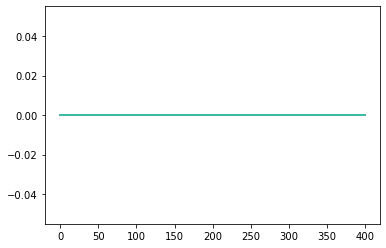

In [102]:
#Основная функция прогонки
CoefficientMethod(a, b, c, Nt, n)
plt.plot(U)
plt.show()